In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

2023-08-29 13:10:22.479056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
df =pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['month']= labelencoder.fit_transform(df['month'])
df['day']= labelencoder.fit_transform(df['day'])
df['size_category']= labelencoder.fit_transform(df['size_category'])
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
# split the data
X = df.iloc[:,0:30]
Y = df.iloc[:,30]

In [8]:
X[0:30]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,...,0,0,0,0,0,0,0,0,0,0
7,1,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,...,0,0,0,0,0,0,0,0,0,0
8,11,5,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,...,0,0,0,0,0,0,0,0,0,1
9,11,2,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
Y[0:30]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: size_category, dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'month'),
  Text(1.5, 0, 'day'),
  Text(2.5, 0, 'FFMC'),
  Text(3.5, 0, 'DMC'),
  Text(4.5, 0, 'DC'),
  Text(5.5, 0, 'ISI'),
  Text(6.5, 0, 'temp'),
  Text(7.5, 0, 'RH'),
  Text(8.5, 0, 'wind'),
  Text(9.5, 0, 'rain'),
  Text(10.5, 0, 'area'),
  Text(11.5, 0, 'dayfri'),
  Text(12.5, 0, 'daymon'),
  Text(13.5, 0, 'daysat'),
  Text(14.5, 0, 'daysun'),
  Text(15.5, 0, 'daythu'),
  Text(16.5, 0, 'daytue'),
  Text(17.5, 0, 'daywed'),
  Text(18.5, 0, 'monthapr'),
  Text(19.5, 0, 'monthaug'),
  Text(20.5, 0, 'monthdec'),
  Text(21.5, 0, 'monthfeb'),
  Text(22.5, 0, 'monthjan'),
  Text(23.5, 0, 'monthjul'),
  Text(24.5, 0, 'monthjun'),
  Text(25.5, 0, 'monthmar'),
  Text(26.5, 0, 'monthmay'),
  Text(27.5, 0, 'monthnov'),
  Text(28.5, 0, 'monthoct'),
  Text(29.5, 0, 'mont

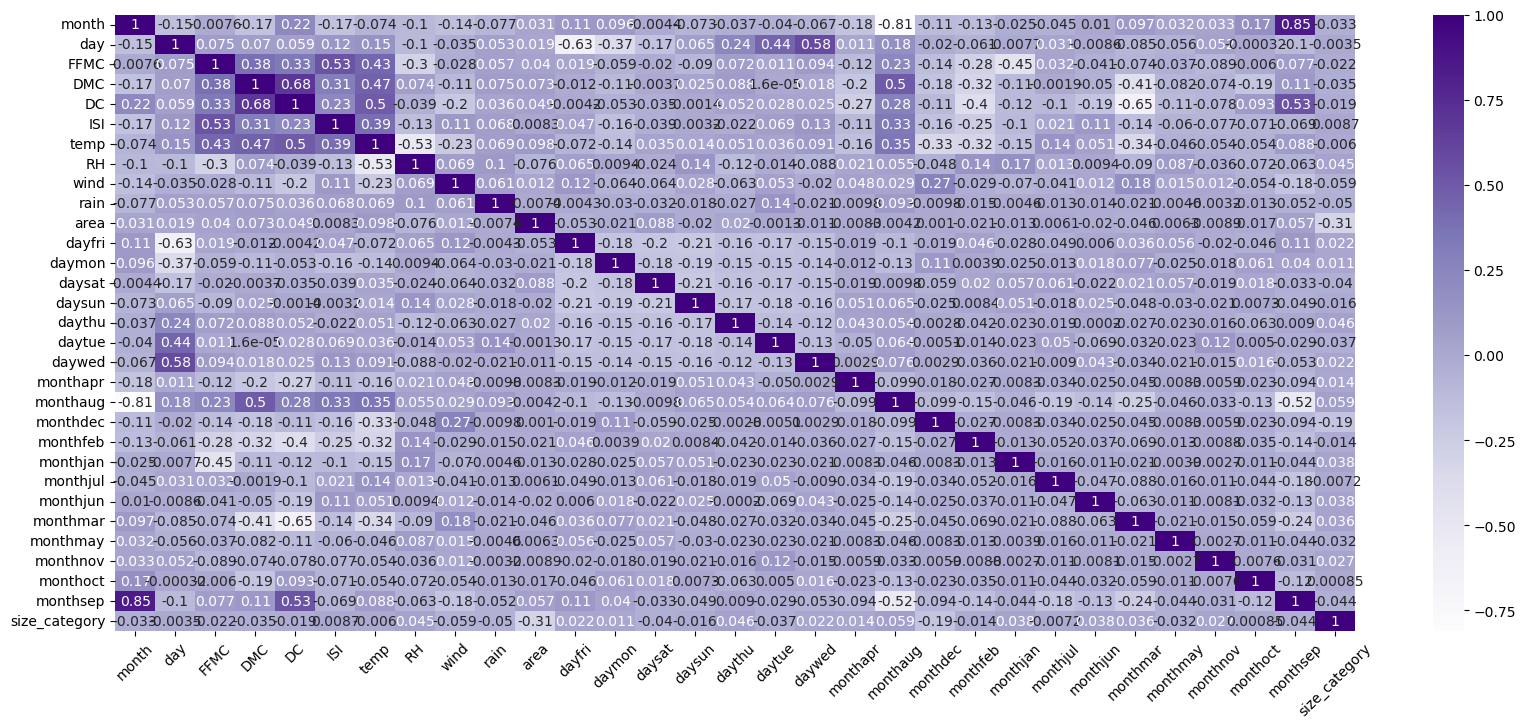

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot = True, cmap='Purples')
plt.xticks(rotation=45)

In [11]:
# cerate model

model = Sequential()
model.add(Dense(12, activation= 'relu')) # 1st layer
model.add(Dense(8, activation= 'relu')) # 2nd layer
model.add(Dense(1, activation= 'sigmoid')) # 3rd layer - top layer
          
# compile model
model.compile(loss= 'binary_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [12]:
# fit the model
history = model.fit(X,Y, validation_split = 0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 2s 13ms/step - loss: 4.3959 - accuracy: 0.7312 - val_loss: 2.9611 - val_accuracy: 0.6491
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: 1.1890 - accuracy: 0.6387 - val_loss: 0.7838 - val_accuracy: 0.4327
Epoch 3/250
35/35 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.4942 - val_loss: 0.7125 - val_accuracy: 0.4444
Epoch 4/250
35/35 [==============================] - 0s 5ms/step - loss: 0.6232 - accuracy: 0.6647 - val_loss: 0.7297 - val_accuracy: 0.5029
Epoch 5/250
35/35 [==============================] - 0s 4ms/step - loss: 0.5892 - accuracy: 0.7139 - val_loss: 0.7215 - val_accuracy: 0.6842
Epoch 6/250
35/35 [==============================] - 0s 4ms/step - loss: 0.5533 - accuracy: 0.7659 - val_loss: 0.6874 - val_accuracy: 0.6901
Epoch 7/250
35/35 [==============================] - 0s 6ms/step - loss: 0.5327 - accuracy: 0.7659 - val_loss: 0.6525 - val_accuracy: 0.7018
Epoch 8/250


Epoch 59/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0469 - accuracy: 0.9855 - val_loss: 0.1192 - val_accuracy: 0.9649
Epoch 60/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0764 - accuracy: 0.9711 - val_loss: 0.1576 - val_accuracy: 0.9357
Epoch 61/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0492 - accuracy: 0.9827 - val_loss: 0.1758 - val_accuracy: 0.9240
Epoch 62/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0673 - accuracy: 0.9798 - val_loss: 0.1448 - val_accuracy: 0.9415
Epoch 63/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.1793 - val_accuracy: 0.9357
Epoch 64/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9884 - val_loss: 0.1194 - val_accuracy: 0.9591
Epoch 65/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0509 - accuracy: 0.9798 - val_loss: 0.1305 - val_accuracy: 0.9532
Epoch 

35/35 [==============================] - 0s 5ms/step - loss: 0.0374 - accuracy: 0.9827 - val_loss: 0.2923 - val_accuracy: 0.9181
Epoch 117/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0460 - accuracy: 0.9769 - val_loss: 0.1508 - val_accuracy: 0.9532
Epoch 118/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9942 - val_loss: 0.1043 - val_accuracy: 0.9649
Epoch 119/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9942 - val_loss: 0.1494 - val_accuracy: 0.9532
Epoch 120/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0298 - accuracy: 0.9913 - val_loss: 0.1191 - val_accuracy: 0.9591
Epoch 121/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0248 - accuracy: 0.9884 - val_loss: 0.1067 - val_accuracy: 0.9649
Epoch 122/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9942 - val_loss: 0.1219 - val_accuracy: 0.9532
Epoch 123/250

35/35 [==============================] - 0s 5ms/step - loss: 0.0134 - accuracy: 0.9971 - val_loss: 0.1134 - val_accuracy: 0.9532
Epoch 174/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0127 - accuracy: 0.9942 - val_loss: 0.1747 - val_accuracy: 0.9532
Epoch 175/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9913 - val_loss: 0.2346 - val_accuracy: 0.9415
Epoch 176/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9798 - val_loss: 0.2007 - val_accuracy: 0.9240
Epoch 177/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9884 - val_loss: 0.1169 - val_accuracy: 0.9591
Epoch 178/250
35/35 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9798 - val_loss: 0.1217 - val_accuracy: 0.9591
Epoch 179/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0886 - accuracy: 0.9798 - val_loss: 0.1672 - val_accuracy: 0.9532
Epoch 180/250

35/35 [==============================] - 0s 6ms/step - loss: 0.0140 - accuracy: 0.9942 - val_loss: 0.1259 - val_accuracy: 0.9649
Epoch 231/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0151 - accuracy: 0.9942 - val_loss: 0.1666 - val_accuracy: 0.9415
Epoch 232/250
35/35 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9942 - val_loss: 0.1513 - val_accuracy: 0.9415
Epoch 233/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9827 - val_loss: 0.1404 - val_accuracy: 0.9591
Epoch 234/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0296 - accuracy: 0.9855 - val_loss: 0.1353 - val_accuracy: 0.9649
Epoch 235/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9855 - val_loss: 0.2279 - val_accuracy: 0.9532
Epoch 236/250
35/35 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9913 - val_loss: 0.1702 - val_accuracy: 0.9532
Epoch 237/250

In [13]:
#evaluate the model
scores = model.evaluate(X,Y)
print(scores)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9729
[0.09761978685855865, 0.9729207158088684]
accuracy: 97.29%


In [15]:
history.history

{'loss': [4.395853042602539,
  1.1890002489089966,
  0.6909381747245789,
  0.6232433319091797,
  0.5892484188079834,
  0.5533139109611511,
  0.5326591730117798,
  0.5048511624336243,
  0.4888502359390259,
  0.49604910612106323,
  0.46369466185569763,
  0.4518439769744873,
  0.414806067943573,
  0.42181599140167236,
  0.39435285329818726,
  0.38266679644584656,
  0.4018637537956238,
  0.375672310590744,
  0.36490121483802795,
  0.3387557566165924,
  0.34973469376564026,
  0.3405381143093109,
  0.3307915925979614,
  0.31615787744522095,
  0.3028602600097656,
  0.3223683536052704,
  0.2899220287799835,
  0.28103914856910706,
  0.28515228629112244,
  0.27158159017562866,
  0.2638617157936096,
  0.257730633020401,
  0.24480299651622772,
  0.23855584859848022,
  0.23064303398132324,
  0.23891735076904297,
  0.22036033868789673,
  0.2171555608510971,
  0.2181108444929123,
  0.20061106979846954,
  0.20152778923511505,
  0.2175317406654358,
  0.20010928809642792,
  0.1901746541261673,
  0.17466

In [16]:
model.history.history.keys()

dict_keys([])

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

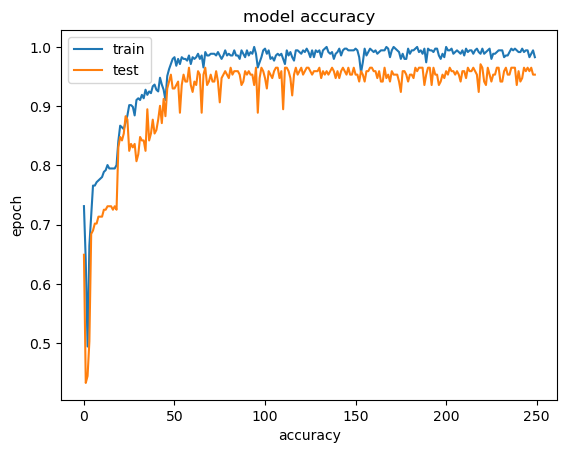

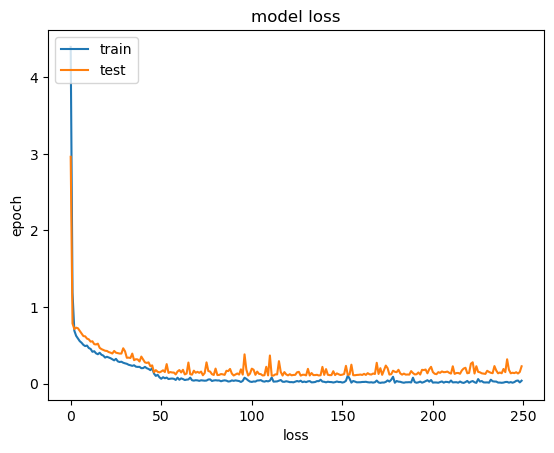

In [20]:
#summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
         
#summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()